In [1]:
## 라이브러리 설정
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import re

In [2]:
# print ('버전: ', mpl.__version__)
# print ('설정 위치: ', mpl.matplotlib_fname())
# print ('설치 위치: ', mpl.__file__)
# print ('설정 위치: ', mpl.get_configdir())
# print ('캐시 위치: ', mpl.get_cachedir())
# print([(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'D2Coding' in f.name])

In [3]:
## 시각화 설정
import seaborn as sns
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

path = '/home/alllhvhla/.local/share/fonts/D2Coding/D2CodingBold-Ver1.3.2-20180524.ttf'
font_name = font_manager.FontProperties(fname = path, size = 10).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
## data crawling with daum search engine

from time import sleep

unique_word = set()
iterator_num = 0
max_iterator_num = 1000
def crawling_related_word(queue, n):
    global unique_word, iterator_num
    if iterator_num > max_iterator_num:
        return
    if len(queue)==0 or n==0:
        print('크롤링 종료')
        return
    df = pd.DataFrame()
    next_queue = []
    print(queue)

    for word in queue:
        iterator_num += 1
        print(iterator_num)
        if iterator_num > max_iterator_num:
            break
        temp_df = pd.DataFrame()
        temp_list = []
        url = 'https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=' + word

        while True:
            try:
                response = requests.get(url)
                break
            except:
                print("sleeping...")
                sleep(5)

        if response.status_code == 200:
            html = response.text
            document = bs(html, 'html.parser')
            try:
                div_inner = document.find('div',class_='list_keyword type2')
                related_word_list = div_inner.find_all('span', class_='wsn')
            except:
                if pd.isna(div_inner):
                    try:
                        div_inner = document.find('div', class_='list_keyword')
                        related_word_list = div_inner.find_all('span',class_='wsn')
                    except:
                        print(word,'연관 검색어가 없습니다.')
                        related_word_list = []

        if len(related_word_list) == 0: continue
        
        for idx, related_word in enumerate(related_word_list):
            next_word = related_word_list[idx].text
            temp_list.append(next_word)
            if not next_word in unique_word:
                next_queue.append(next_word)
                unique_word.add(next_word)
            # print(related_word_list[idx].text)
            
        temp_df['sub_word'] = temp_list
        temp_df['sup_word'] = word
        df = pd.concat([df,temp_df],axis=0)
    df = pd.concat([df, crawling_related_word(next_queue, n-1)], axis=0)
    return df.reset_index(drop=True)

word_list = ['여행 코로나']
for word in word_list: 
    unique_word.add(word)

df_crawl = crawling_related_word(word_list,3)

['여행 코로나']
1
['코로나 금지', '코로나 국내여행', '코로나 여행 할인', '코로나 여행 지원', '코로나 외국여행']
2
3
4
5
6
['코로나 집합금지', '코로나 영업금지', '코로나 제한', '코로나 모임', '코로나 출입 금지', '코로나 19', '수도권 5인이상금지', '코로나 모임금지', '코로나 방역', '학교 재택근무', '코로나 제주여행', '코로나 해외 여행', '제주여행 코로나검사', '제주도 여행 코로나검사', '1박2일 국내여행', '신종코로나 국내여행', '제주도여행 코로나', '코로나 국내 사망자', '하나여행', '정부 여행 쿠폰', '코로나여행 경비 지원', '위드 코로나 숙박 할인', '국내여행 할인상품', '코로나 여행 지원금', '코로나 가족여행', '코로나 단체 여행', '코로나 해외여행 가능국가', '괌 여행 코로나', '중국 코로나 책임', '해외 여행 코로나', '코로나 세계여행']
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
크롤링 종료


In [5]:
str_word_list = '_'.join(word_list)
df_crawl, str_word_list

(        sub_word  sup_word
 0         코로나 금지    여행 코로나
 1       코로나 국내여행    여행 코로나
 2      코로나 여행 할인    여행 코로나
 3      코로나 여행 지원    여행 코로나
 4       코로나 외국여행    여행 코로나
 ..           ...       ...
 468     유럽여행 코로나  코로나 세계여행
 469    코로나 세계 현황  코로나 세계여행
 470     코로나 외국여행  코로나 세계여행
 471    해외 여행 코로나  코로나 세계여행
 472  뉴질랜드 여행 코로나  코로나 세계여행
 
 [473 rows x 2 columns],
 '여행 코로나')

In [6]:
## 데이터프레임 저장 for 형태소 분석
df_crawl.to_csv("data_from_daum{}.csv".format(str_word_list), index=False)

In [8]:
## DTM 파일 읽어오기
dtm = pd.read_csv("DTM{}.csv".format(str_word_list))
dtm

,1,10,11,12,19,2,3,4,5,7,...,현황,혜택,호텔,홈페이지,홍천,확,확산,확인,회식,후
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
## text network: 단어쌍 만들기
from tqdm import tqdm

dataset = dtm.copy()
column_list = dataset.columns
word_length = len(column_list)

count_dict = {}

for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
  tmp = dataset.loc[doc_number] # 현재 문서의 단어 출현 빈도 데이터를 가져온다. 
  for i, word1 in enumerate(column_list): 
    if tmp[word1]: # 현재 문서에 첫번째 단어가 존재할 경우 
      for j in range(i + 1, word_length): 
        if tmp[column_list[j]]: # 현재 문서에 두번째 단어가 존재할 경우 
          count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])

# count_list에 word1, word2, frequency 형태로 저장할 것이다.
count_list = []

for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])

# 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

# 이 작업이 오래 걸리기 때문에 csv파일로 저장 후 사용하는 것을 추천한다.
df.to_csv('networkx{}.csv'.format(str_word_list), encoding='utf-8-sig', index=False)


단어쌍 만들기 진행중: 100%|██████████| 473/473 [00:01<00:00, 398.22it/s]


In [18]:
word_list = ["여행 코로나"]
str_word_list = '_'.join(word_list)

df = pd.read_csv('networkx{}.csv'.format(str_word_list), encoding='utf-8-sig')
# df = df.drop(["Unnamed: 0"], axis=1)
df

,word1,word2,freq
0,여행,코로나,64
1,검사,코로나,36
2,금지,코로나,27
3,19,코로나,27
4,국내,여행,25
...,...,...,...
997,접종,코로나,1
998,접종,해외여행,1
999,접종,후,1
1000,코로나,후,1


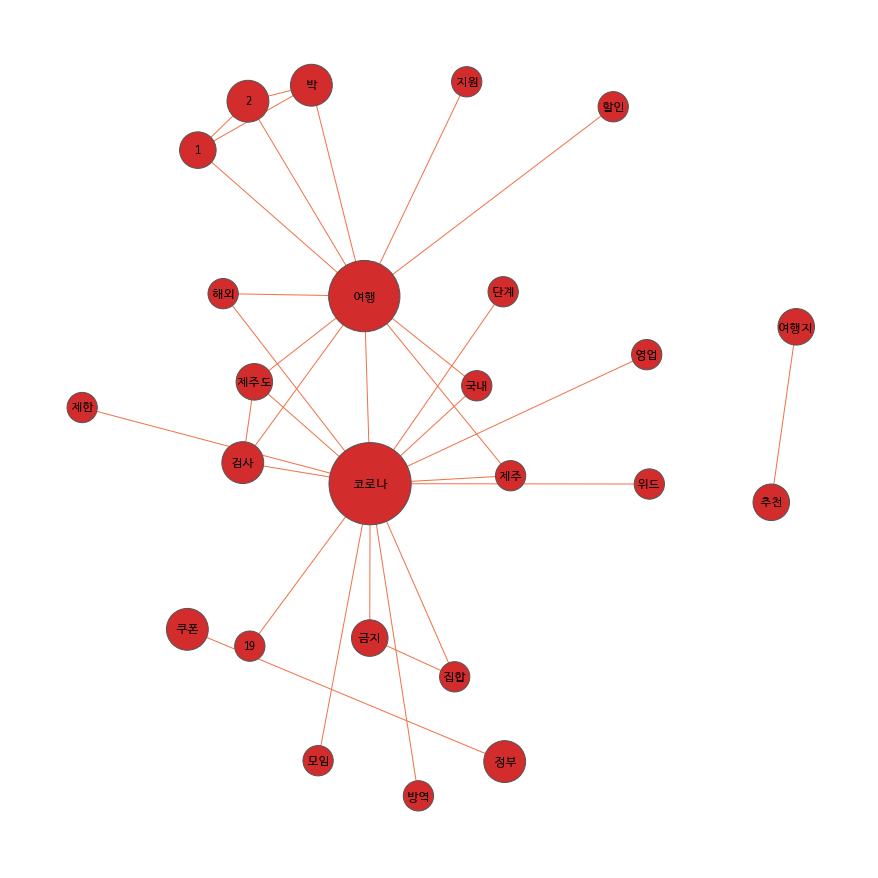

In [28]:
## text network: 그리기
import networkx as nx
import operator

dataset = df.copy()

G_centrality = nx.Graph()

for ind in range(len(np.where(dataset['freq'] >= 10)[0])):
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))
  
dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True) 
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True) 
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True) 
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True) 
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

G = nx.Graph()

for i in range(len(sorted_pgr)): 
  G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

for ind in range(len(np.where(dataset['freq'] >= 10)[0])):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize'] * 10000+500 for node in G]

pos = nx.spring_layout(G, k=4, iterations=100)
options = { 'edge_color': '#F07249', 'width': 1, 'with_labels': True, 'font_weight': 'regular', 'node_color':"#D22C2C", 'font_color':"#000000"}

plt.figure(figsize=(12, 12))

nx.draw(G, node_size=sizes, pos=pos, **options, font_family=font_name) # font_family로 폰트 등록 

# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels )
 
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.savefig("Graph{}.png".format(str_word_list), format="PNG")
plt.show()

In [12]:
# 단어 별 개수 구하기
word_num = dtm.apply(lambda col: sum(col), axis=0)
word_str = ''
for key, value in word_num.items():
    word_str += (key+' ')*value

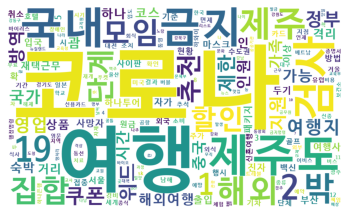

In [13]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
# fontprop = fm.FontProperties(fname=path, size=18).get_name()
plt.imshow(wc.generate_from_frequencies(word_num))
plt.axis("off")
plt.show()

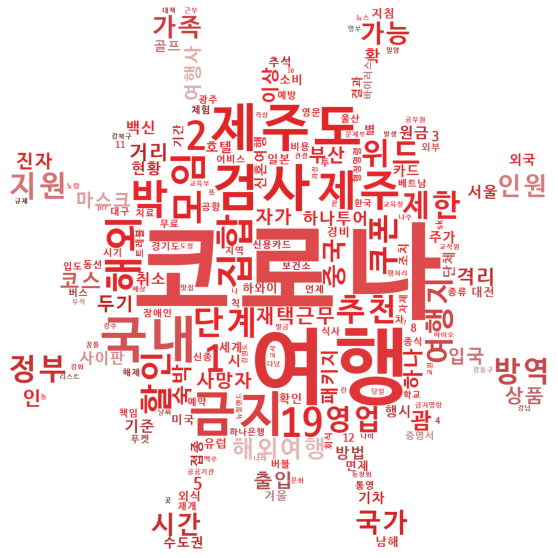

In [14]:
from PIL import Image
from wordcloud import ImageColorGenerator

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 10))
    # Display image
    plt.imshow(wordcloud) 
    plt.axis("off");

image_mask = np.array(Image.open('mask.jpg'))
image_colors = ImageColorGenerator(image_mask)

wordcloud = WordCloud(width = 1000, height = 1000,
    random_state=1, background_color='white', font_path=path, 
    colormap='Set2', collocations=False, mask=image_mask).generate_from_frequencies(word_num)
plot_cloud(wordcloud.recolor(color_func=image_colors))
plt.savefig('wordcloud{}.png'.format(str_word_list))
# plt.savefig('wordcloud.png')